# import

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# path to string

In [6]:
path = r'C:\Users\leevg\OneDrive\Desktop\CF\DI\A6'

In [7]:
%matplotlib inline

# import data

In [12]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'TSA Claims Cleaned Data.csv'))

In [13]:
df.head()

,Unnamed: 0,Date Received,Incident Date,State,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0,6/20/02,5/9/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Other,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full
1,1,6/20/02,6/16/02,Arizona,Phoenix Sky Harbor International,Other,Property Damage,Checkpoint,Computers,2270.09,Canceled,0.0,Cancel
2,2,6/25/02,5/4/02,Georgia,Hartsfield-Jackson Atlanta International Airport,Other,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,0.0,Deny
3,3,7/8/02,6/12/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Other,Checkpoint,Glasses & Contacts,16.71,Approved,17.0,Approve in Full
4,4,7/8/02,6/4/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Other,Other,Clothing,450.00,Canceled,0.0,Cancel


In [14]:
df = df.drop(columns = 'Unnamed: 0')

# correlation plot

In [15]:
# pandas correlation matrix

df.corr()

,Claim Amount,Close Amount
Claim Amount,1.000000,-0.000395
Close Amount,-0.000395,1.000000


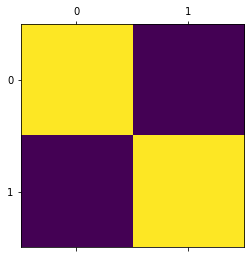

In [16]:
# matplotlib correlation heatmap

plt.matshow(df.corr())
plt.show()

In [17]:
# using the code from the Taipei housing example notebook

Text(0.5, 1.0, 'Correlation Matrix')

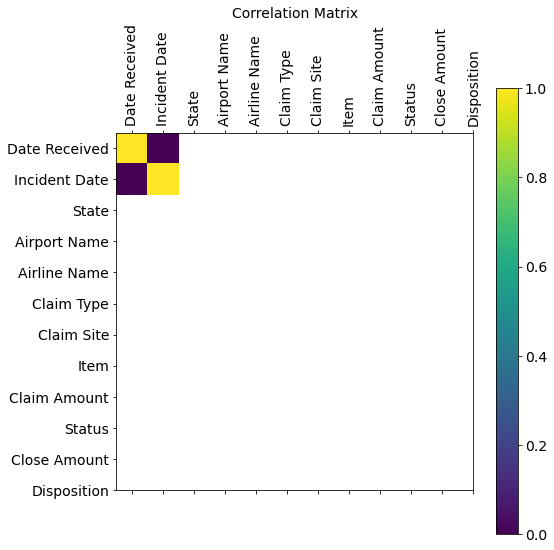

In [18]:
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

# correlation heat map

In [19]:
df.columns

Index(['Date Received', 'Incident Date', 'State', 'Airport Name',
       'Airline Name', 'Claim Type', 'Claim Site', 'Item', 'Claim Amount',
       'Status', 'Close Amount', 'Disposition'],
      dtype='object')

In [20]:
# create subset with the only continuous variables

sub = df[['Claim Amount', 'Close Amount']]

In [21]:
sub

,Claim Amount,Close Amount
0,75.00,75.00
1,2270.09,0.00
2,4457.29,0.00
3,16.71,17.00
4,450.00,0.00
...,...,...
139196,106.00,106.00
139197,40.00,40.00
139198,149.99,149.99
139199,46.51,46.51


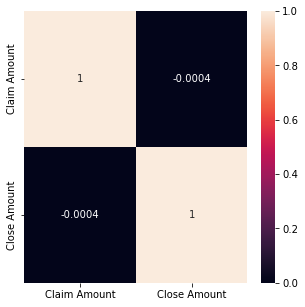

In [22]:
# matplotlib subplot
f,ax = plt.subplots(figsize=(5,5))

# apply heatmap onto the correlation matrix and subplot
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

In [23]:
# This shows no correlation at all between the two variables.

# scatter plot

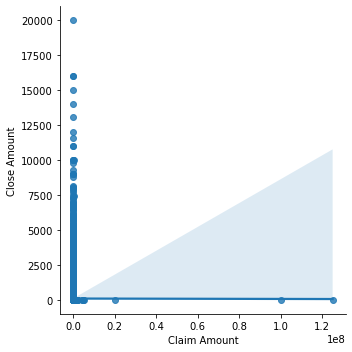

In [24]:
sns.lmplot(x = 'Claim Amount', y = 'Close Amount', data = df)

In [25]:
# Again, there is zero correlation between the claim amount and the close amount.

# pair plot

In [26]:
# I ran the code below to create a pair plot, but every time it crashed my computer for hours and was never able to complete.

In [27]:
# g = sns.pairplot(sub)

# categorical plot

<AxesSubplot:xlabel='Close Amount', ylabel='Count'>

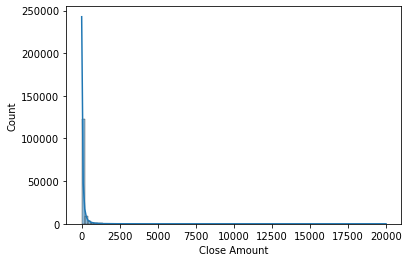

In [28]:
# visualize the distribution of variables with a histogram

sns.histplot(df['Close Amount'], bins = 100, kde = True)

In [29]:
df.loc[df['Close Amount'] < 50, 'Close Category'] = 'Low price'

In [30]:
df.loc[(df['Close Amount'] >= 50) & (df['Close Amount'] < 200), 'Close Category'] = 'Medium Price'

In [31]:
df.loc[df['Close Amount'] >= 200, 'Close Category'] = 'High Price'

In [32]:
df['Close Category'].value_counts(dropna = False)

Low price       91825
Medium Price    31215
High Price      16161
Name: Close Category, dtype: int64

In [33]:
df.columns

Index(['Date Received', 'Incident Date', 'State', 'Airport Name',
       'Airline Name', 'Claim Type', 'Claim Site', 'Item', 'Claim Amount',
       'Status', 'Close Amount', 'Disposition', 'Close Category'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Property Damage'),
  Text(2, 0, 'Passenger Property Loss'),
  Text(3, 0, 'Personal Injury'),
  Text(4, 0, 'Passenger Theft'),
  Text(5, 0, 'Employee Loss (MPCECA)'),
  Text(6, 0, 'Motor Vehicle'),
  Text(7, 0, 'Complaint')])

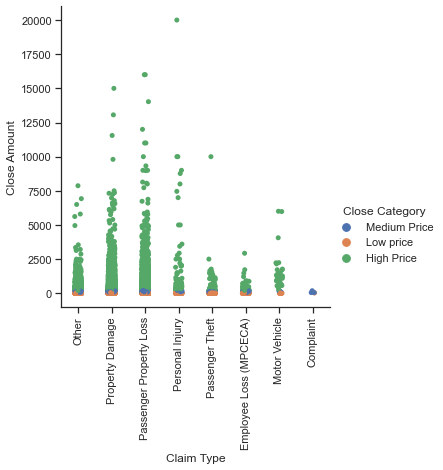

In [34]:
sns.set(style = 'ticks')
g = sns.catplot(x = 'Claim Type', y = 'Close Amount', hue = 'Close Category', data = df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Approved'),
  Text(1, 0, 'Canceled'),
  Text(2, 0, 'Denied'),
  Text(3, 0, 'Settled')])

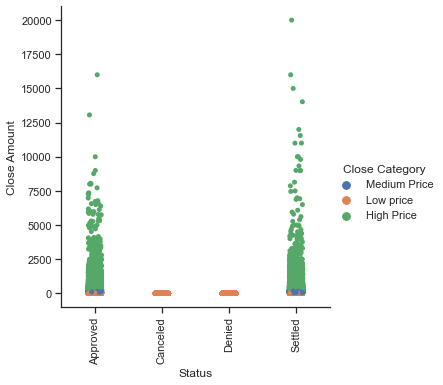

In [40]:
sns.set(style = 'ticks')
g = sns.catplot(x = 'Status', y = 'Close Amount', hue = 'Close Category', data = df)
plt.xticks(rotation=90)

# Answers to Past Questions

# 1) The majority of claims filed are regarding property damage or loss.

# 2) The highest amount paid is around $20,000

# New Questions

 # 1) Are expensive claims more likely to be denied?

# 2) Settled claims are what average percent of their original value?

# Hypotheses

# 1) Expensive claims are more likely to be denied

# 2) Canceled claims are more likely to be low priced. Perhaps people think the procedure is not worth it and cancel.

# Export

In [35]:
df.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'TSA Claims Task 6.2.csv'))